# Proportion of women in the privet sector

the data set represents the distribution of the female employees and the total employees in the private sector (excluding the Free zone) by the following attributes: 
- (1) gender
- (2) age class
- (3) emirate
- (4) skill level as per labour law in UAE 
- (5) the occupation at the level of major group of the International Standard Classification of Occupations ISCO-08
- (6) the economic activity at the level of section as per the International Standard of Industries Classification version 3.1 (ISIC 3.1). 2011-2019"

## Dataset reference
https://admin.bayanat.ae/Home/DatasetInfo?dID=CfV_VsFm8y0kX0e3Vpk2w98zki9h5gRx0wcMNPNqKZk&langKey=en

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Data

In [2]:
df = pd.read_excel('data/Proportionofwomenintheprivetsector2011-2019.xlsx')

# Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108521 entries, 0 to 108520
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           108521 non-null  int64  
 1   Age_Class_En   108521 non-null  object 
 2   Age_Class_Ar   108521 non-null  object 
 3   Emirate_EN     108521 non-null  object 
 4   Emirate_AR     108521 non-null  object 
 5   City_EN        108521 non-null  object 
 6   City_AR        108521 non-null  object 
 7   LONGITUDE      108521 non-null  float64
 8   LATITUDE       108521 non-null  float64
 9   Activity_EN    108515 non-null  object 
 10  Activity_AR    108515 non-null  object 
 11  Occupation_EN  108521 non-null  object 
 12  Occupation_AR  108521 non-null  object 
 13  Male           107438 non-null  float64
 14  Femal          84089 non-null   float64
 15  Total          108521 non-null  int64  
 16  POW_PS_Count   108521 non-null  float64
dtypes: float64(5), int64(2), obje

In [4]:
df.head()

Year Age_Class_En Age_Class_Ar     Emirate_EN  Emirate_AR        City_EN  \
0  201112        25-29        25-29        Sharjah     الشارقة        Sharjah   
1  201112        40-44        40-44          Dubai         دبى          Dubai   
2  201112        25-29        25-29      Abu Dhabi     أبو ظبي      Abu Dhabi   
3  201112        20-24        20-24      Abu Dhabi     أبو ظبي      Abu Dhabi   
4  201112        55-59        55-59  Ras Al Khaima  رأس الخيمة  Ras El-Khaema   

      City_AR  LONGITUDE   LATITUDE               Activity_EN  \
0     الشارقة  55.513641  25.322327             Manufacturing   
1         دبى  55.296249  25.276987             Manufacturing   
2     أبو ظبي  54.366669  24.466667  Financial intermediation   
3     أبو ظبي  54.366669  24.466667       Business activities   
4  رأس الخيمة  55.976200  25.800694             Manufacturing   

         Activity_AR                                  Occupation_EN  \
0  الصناعة التحويلية             7-Craft and related trades workers   
1  الصناعة التحويلية      3-Technicians and associate professionals   
2    الوساطة المالية                     4-Clerical support workers   
3      خدمات الاعمال      3-Technicians and associate professionals   
4  الصناعة التحويلية  8-Plant and machine operators, and assemblers   

                                       Occupation_AR     Male  Femal  Total  \
0  7-الحرفيون في البناء والمهن الإستخراجية والحرف...  10337.0   43.0  10380   
1  3-  الفنيون في المواضيع العلمية والفنية والإنس...   1012.0   39.0   1051   
2                      4- المهــــــــن الكتابيــــة    522.0  346.0    868   
3  3-  الفنيون في المواضيع العلمية والفنية والإنس...    324.0   49.0    373   
4                 8-  مشغلو الآلات والمعدات ومجمعوها     57.0    0.0     57   

   POW_PS_Count  
0      0.004143  
1      0.037108  
2      0.398618  
3      0.131367  
4      0.000000

In [209]:
df.sample(3)

Year Age_Class_En Age_Class_Ar Emirate_EN Emirate_AR   City_EN  \
26829   201312        30-34        30-34      Ajman      عجمان     Ajman   
101710  201912        40-44        40-44      Ajman      عجمان     Ajman   
91752   201812        50-54        50-54   Fujairah    الفجيرة  Fujiarah   

        City_AR  LONGITUDE  LATITUDE          Activity_EN    Activity_AR  \
26829     عجمان   55.43504  25.41111  Business activities  خدمات الاعمال   
101710    عجمان   55.43504  25.41111  Business activities  خدمات الاعمال   
91752   الفجيرة   56.26176  25.59246  Business activities  خدمات الاعمال   

                                    Occupation_EN  \
26829   3-Technicians and associate professionals   
101710         7-Craft and related trades workers   
91752                             2-Professionals   

                                            Occupation_AR   Male  Femal  \
26829   3-  الفنيون في المواضيع العلمية والفنية والإنس...  111.0   18.0   
101710  7-الحرفيون في البناء والمهن الإستخراجية والحرف...  146.0    3.0   
91752   2-  الإختصاصيون في المواضيع العلمية والفنية وا...   30.0    NaN   

        Total  POW_PS_Count  
26829     129      0.139535  
101710    149      0.020134  
91752      30      0.000000

# Data Cleaning

In [210]:
df2 = df

### Drop Useless Columns

In [211]:
df2.columns

Index(['Year', 'Age_Class_En', 'Age_Class_Ar', 'Emirate_EN', 'Emirate_AR',
       'City_EN', 'City_AR', 'LONGITUDE', 'LATITUDE', 'Activity_EN',
       'Activity_AR', 'Occupation_EN', 'Occupation_AR', 'Male', 'Femal',
       'Total', 'POW_PS_Count'],
      dtype='object')

In [212]:
df2 = df2.drop('Age_Class_Ar', axis = 1)
df2 = df2.drop('Emirate_AR', axis = 1)
df2 = df2.drop('City_AR', axis = 1)
df2 = df2.drop('Activity_AR', axis = 1)
df2 = df2.drop('Occupation_AR', axis = 1)

### Handle Missing Values

In [213]:
df2.isnull().sum()

Year                 0
Age_Class_En         0
Emirate_EN           0
City_EN              0
LONGITUDE            0
LATITUDE             0
Activity_EN          6
Occupation_EN        0
Male              1083
Femal            24432
Total                0
POW_PS_Count         0
dtype: int64

In [214]:
df2.isnull().sum().max()

24432

In [215]:
df2 = df2.dropna()

In [216]:
df2.isnull().sum()

Year             0
Age_Class_En     0
Emirate_EN       0
City_EN          0
LONGITUDE        0
LATITUDE         0
Activity_EN      0
Occupation_EN    0
Male             0
Femal            0
Total            0
POW_PS_Count     0
dtype: int64

### Duplications

In [217]:
df2.duplicated().sum()

0

In [218]:
df2[df2.duplicated()]

Empty DataFrame
Columns: [Year, Age_Class_En, Emirate_EN, City_EN, LONGITUDE, LATITUDE, Activity_EN, Occupation_EN, Male, Femal, Total, POW_PS_Count]
Index: []

### Rename Columns

In [219]:
df2.columns

Index(['Year', 'Age_Class_En', 'Emirate_EN', 'City_EN', 'LONGITUDE',
       'LATITUDE', 'Activity_EN', 'Occupation_EN', 'Male', 'Femal', 'Total',
       'POW_PS_Count'],
      dtype='object')

In [220]:
df2.columns = ['Year', 'Age_Class', 'Emirate', 'City', 'LONGITUDE',
       'LATITUDE', 'Activity', 'Occupation', 'Male', 'Female', 'Total',
       'POW_PS_Count']

In [221]:
df2['Occupation'].unique().tolist()

['7-Craft and related trades workers',
 '3-Technicians and associate professionals',
 '4-Clerical support workers',
 '8-Plant and machine operators, and assemblers',
 '9-Elementary occupations',
 '5-Service and sales workers',
 '1-Managers',
 '6-Skilled agricultural, forestry and fishery workers',
 '2-Professionals',
 'X-NA']

In [222]:
df2['Age_Class'].unique().tolist()

['25-29',
 '40-44',
 '20-24',
 '55-59',
 '30-34',
 '45-49',
 '35-39',
 '50-54',
 '65-69',
 '70+',
 '60-64',
 '16-19',
 '<16']

In [223]:
df2['City'].unique().tolist()

['Sharjah',
 'Dubai',
 'Abu Dhabi',
 'Ras El-Khaema',
 'Madina Zayed',
 'Fujiarah',
 'Kalbaa',
 'Al-Ain',
 'Om-El-Quain',
 'Ajman',
 'Zones-Corp Abu Dhabi',
 'Khorfkan',
 'Delma',
 'Zones-Corp Al-Ain']

In [224]:
df2['POW_PS_Count'].describe()

count    83000.000000
mean         0.144126
std          0.222340
min          0.000000
25%          0.000000
50%          0.033333
75%          0.200000
max          1.000000
Name: POW_PS_Count, dtype: float64

In [225]:
df2['Emirate'].unique().tolist()

['Sharjah',
 'Dubai',
 'Abu Dhabi',
 'Ras Al Khaima',
 'Fujairah',
 'Um Al Qaiwain',
 'Ajman']

In [226]:
df2.sample(3)

Year Age_Class        Emirate          City  LONGITUDE   LATITUDE  \
43173  201412       70+        Sharjah      Khorfkan  55.513641  25.322327   
61622  201612     25-29  Um Al Qaiwain   Om-El-Quain  55.713391  25.520482   
57981  201512     65-69      Abu Dhabi  Madina Zayed  54.366669  24.466667   

                                    Activity                   Occupation  \
43173                          Manufacturing                   1-Managers   
61622                    Business activities  5-Service and sales workers   
57981  Transport, storage and communications              2-Professionals   

       Male  Female  Total  POW_PS_Count  
43173   1.0     0.0      1      0.000000  
61622  11.0     1.0     12      0.083333  
57981   1.0     0.0      1      0.000000

In [227]:
df2['Total'].describe()

count    83000.000000
mean       480.442843
std       2599.189507
min          1.000000
25%          5.000000
50%         27.000000
75%        155.000000
max      90032.000000
Name: Total, dtype: float64

In [228]:
df2['Age_Class'].unique().tolist()

['25-29',
 '40-44',
 '20-24',
 '55-59',
 '30-34',
 '45-49',
 '35-39',
 '50-54',
 '65-69',
 '70+',
 '60-64',
 '16-19',
 '<16']

### Save changes after cleaning data

In [229]:
df = df2

# Statistics

### 1. What is the average count of Female workers in the UAE's private sectors?

In [230]:
df['Female'].mean()

44.0555421686747

### 2. What is the average count of Female workers in the Financial intermediation sectors in the UAE?

In [231]:
df[ df['Activity'] == 'Financial intermediation']["Female"].mean()

35.00450349020491

### 3. What is the count of Sectors that contains more than 2000 Female worker and located in Dubai Emirate?

In [232]:
len(df[(df['Female'] > 2000) & (df['Emirate'] == 'Dubai')])

227

### 4. What is the total count of Female workers for each Age class?

In [233]:
df.groupby("Age_Class")['Female'].sum()

Age_Class
16-19      7309.0
20-24    286427.0
25-29    873663.0
30-34    902152.0
35-39    644552.0
40-44    390545.0
45-49    227853.0
50-54    124695.0
55-59     61578.0
60-64     23720.0
65-69      5608.0
70+      108486.0
<16          22.0
Name: Female, dtype: float64

### 5. What is the distribution of the private sectors in the UAE for each Occupation sorted ascending?

In [234]:
df['Occupation'].value_counts().sort_values()

X-NA                                                      169
6-Skilled agricultural, forestry and fishery workers     2857
1-Managers                                               8287
7-Craft and related trades workers                       8657
8-Plant and machine operators, and assemblers            9373
2-Professionals                                         10026
3-Technicians and associate professionals               10337
5-Service and sales workers                             10743
9-Elementary occupations                                10844
4-Clerical support workers                              11707
Name: Occupation, dtype: int64

### 6. What is the average of female workers count in each Occupation type sorted ascending?

In [235]:
df.groupby("Occupation")['Female'].mean().sort_values()

Occupation
X-NA                                                      0.035503
6-Skilled agricultural, forestry and fishery workers      0.555128
8-Plant and machine operators, and assemblers             3.699563
7-Craft and related trades workers                        4.194294
1-Managers                                               21.047665
3-Technicians and associate professionals                27.594273
9-Elementary occupations                                 30.610476
2-Professionals                                          73.908737
4-Clerical support workers                               74.157256
5-Service and sales workers                             110.142418
Name: Female, dtype: float64

### 7. What is the count of the Managers sector in each emirate sorted ascending?

In [236]:
df[df['Occupation'] == '1-Managers']['Emirate'].value_counts().sort_values()

Um Al Qaiwain     587
Fujairah          683
Ras Al Khaima     794
Ajman             849
Dubai            1359
Sharjah          1397
Abu Dhabi        2618
Name: Emirate, dtype: int64

### 8. What are the most frequent Age Level in Abu Dhabi emirate?

In [237]:
counts = df[df['Emirate'] == "Abu Dhabi"]['Age_Class'].value_counts().sort_index()
ax = counts.plot.bar(color='green', figsize=(8, 6))
ax.set_title('Distribution of workers in private sectors in Abu Dhabi emirate based on Age Class')
ax.set_xlabel('Age Class')
ax.set_ylabel('Number of Private sectors')
plt.show()


### 9.1 What is ratio of sectors with no female workers in each city?

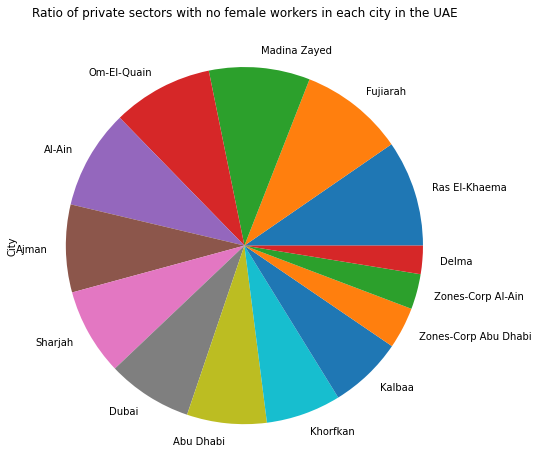

In [238]:
counts = df[df['Female'] == 0]['City'].value_counts()
ax = counts.plot.pie( figsize=(8, 10))
ax.set_title('Ratio of private sectors with no female workers in each city in the UAE')
plt.show()

#### 9.2 What is ratio of sectors with female workers only in each city?

In [239]:
counts = df[df['Male'] == 0]['City'].value_counts()
ax = counts.plot.pie( figsize=(8, 10))
ax.set_title('Ratio of private sectors with female workers only in each city in the UAE')
plt.show()

### 10. What is the distribution of the private sectors based on the Activity type?

In [240]:
counts = df['Activity'].value_counts()
ax = counts.plot.barh( figsize=(7, 5))
ax.set_title('Distribution of the private sectors based on the type of activity')
ax.set_xlabel('Activity type')
ax.set_ylabel('Sectors count')
plt.show()